* COMP 8157 Advanced Database Topics 
* Mini Project on Data Visualization

# Purpose

Due to new travel restrictions by the government of Canada, many international students have to remain quarantined at the hotel resulting in a large amount of mental and financial burden. But at the same time, we can't blame the government as they are trying to stop the spread. So, in this project, I will try to find the pattern from visuals on <strong>how people's travel history is related to coronavirus spread</strong> while analyzing other features too.

# Description

We will analyze different feature and understand the visuals by closely observing them 
 1. comparing genders
 2. age group
 3. provinces 
 4. <strong>transmission and travel history</strong>


## Dataset:

- Name: COVID-19 Canada Open Data Working Group 

- URL: https://github.com/ccodwg/Covid19Canada


### Importing libraries and Reading data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [2]:
df_cases=pd.read_csv("./covid_19_canada/cases_2020.csv")
df_mort=pd.read_csv("./covid_19_canada/mortality_2020.csv")

print("Shape of Cases:", df_cases.shape)
print("Shape of Mortality:", df_mort.shape)

Shape of Cases: (584448, 16)
Shape of Mortality: (15666, 12)


In [3]:
df_cases.head()

,case_id,provincial_case_id,age,sex,health_region,province,country,date_report,report_week,travel_yn,travel_history_country,locally_acquired,case_source,additional_info,additional_source,method_note
0,1,1,50-59,Male,Toronto,Ontario,Canada,25-01-2020,19-01-2020,1,China,NaN,ON1,ON873,ON228,0.0
1,2,2,50-59,Female,Toronto,Ontario,Canada,27-01-2020,26-01-2020,1,China,NaN,ON2,ON1,ON228,0.0
2,3,1,40-49,Male,Not Reported,BC,Canada,28-01-2020,26-01-2020,1,China,NaN,BC1,BC1,BC228,1.0
3,4,3,20-29,Female,Middlesex-London,Ontario,Canada,31-01-2020,26-01-2020,1,China,NaN,ON3,ON873,ON228,0.0
4,5,2,50-59,Female,Vancouver Coastal,BC,Canada,04-02-2020,02-02-2020,0,NaN,Close Contact,BC2,BC2,BC228,NaN


In [4]:
df_mort.head()

,death_id,province_death_id,case_id,age,sex,health_region,province,country,date_death_report,death_source,additional_info,additional_source
0,1,1,60.0,80-89,Male,Vancouver Coastal,BC,Canada,08-03-2020,BC1,BC1,NaN
1,2,1,477.0,70-79,Male,Simcoe Muskoka,Ontario,Canada,11-03-2020,ON1,ON1,NaN
2,3,2,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,BC2,BC1,NaN
3,4,3,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,BC2,BC1,NaN
4,5,4,NaN,Not Reported,Not Reported,Vancouver Coastal,BC,Canada,16-03-2020,BC2,BC1,NaN


# Visualization:

## Gender wise

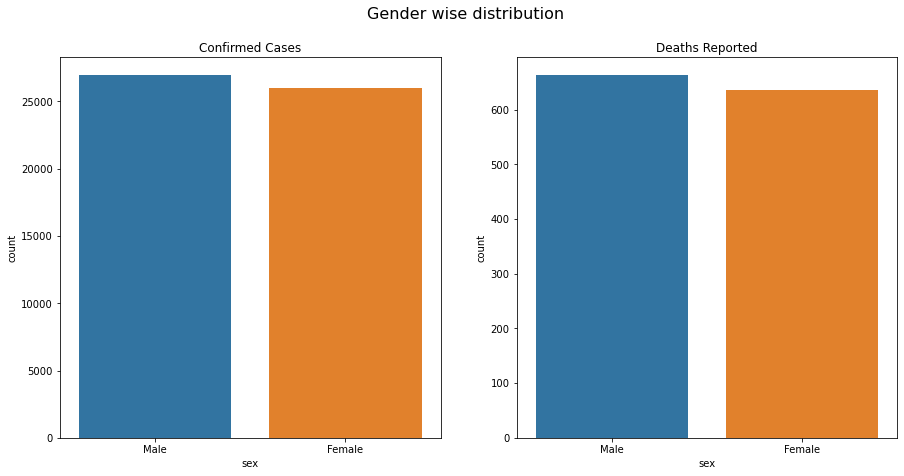

In [5]:
df_mort.sex.unique()

plt.figure(figsize=(15,7))
plt.suptitle("Gender wise distribution", fontsize=16)
plt.subplot(1,2,1)
plt.title("Confirmed Cases")
sns.countplot('sex', data=df_cases[df_cases.sex!='Not Reported'])

plt.subplot(1,2,2)
plt.title("Deaths Reported")
sns.countplot('sex', data=df_mort[df_mort.sex!='Not Reported'])

plt.show()

 <strong>Observation:</strong> We can observe that number of males effected by coronavirus is more than female

## Age wise

In [6]:
# df_cases.age.unique()

In [7]:
# Grouping different inputs to one like  >60 and 60+ is same as 60-69
df_cases.age[df_cases.age=='<18']='10-19'
df_cases.age[df_cases.age=='<1']='0-9'
df_cases.age[df_cases.age=='2']='0-9'
df_cases.age[df_cases.age=='<10']='0-9'
df_cases.age[df_cases.age=='61']='60-69'
df_cases.age[df_cases.age=='>60']='60-69'
df_cases.age[df_cases.age=='65-69']='60-69'
df_cases.age[df_cases.age=='>70']='70-79'

df_cases.age[df_cases.age=='50']='50-59'
df_cases.age[df_cases.age=='<20']='10-19'

df_cases.age[df_cases.age=='45-65']='40-49'
df_cases.age[df_cases.age=='>80']='80-89'
df_cases.age[df_cases.age=='80+']='80-89'
df_cases.age[df_cases.age=='>90']='90-99'
df_cases.age[df_cases.age=='90+']='90-99'
df_cases.age[df_cases.age=='45-65']='40-49'
df_cases.age[df_cases.age=='45-65']='40-49'


# df_cases.age.value_counts()

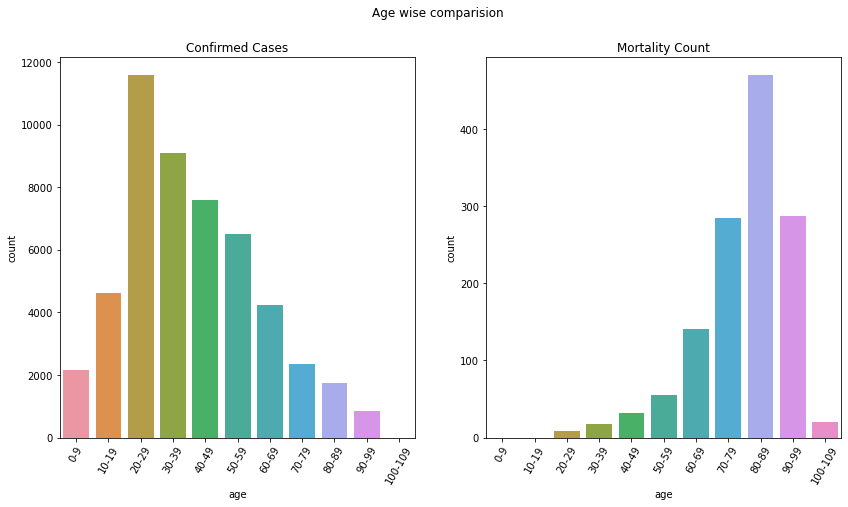

In [8]:
order_age=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99','100-109']

plt.figure(figsize=(14,7))
plt.suptitle("Age wise comparision")

plt.subplot(1,2,1)
plt.title("Confirmed Cases")
sns.countplot('age', data=df_cases[df_cases.age!='Not Reported'], order=order_age)
plt.xticks(rotation=60)

plt.subplot(1,2,2)
plt.title("Mortality Count")
sns.countplot('age', data=df_mort[df_mort.age!='Not Reported'], order=order_age)
plt.xticks(rotation=60)

plt.show()

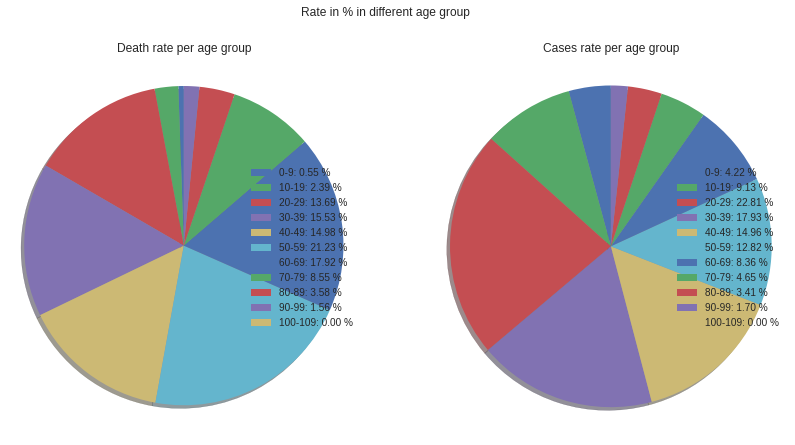

In [9]:
death_count = []
for age in order_age:
    death_count.append(df_mort[df_cases.age==age].shape[0])
death_sum = sum(death_count)

case_count = []
for age in order_age:
    case_count.append(df_cases[df_cases.age==age].shape[0])
case_sum = sum(case_count)

plt.style.use('seaborn')

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,7))
fig.suptitle("Rate in % in different age group")

ax1.pie(death_count, shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Death rate per age group')
ax1.legend(loc = 'right', labels=['%s: %1.2f %%' % (l, s*100.0/death_sum ) for l, s in zip(order_age, death_count)])

ax2.pie(case_count, shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Cases rate per age group')
ax2.legend(loc = 'right', labels=['%s: %1.2f %%' % (l, s*100.0/case_sum ) for l, s in zip(order_age, case_count)])

plt.show()

 <strong>Observation:</strong> 
  - The covid infection rate is heighest in 20-29 and 30-39 age group but death rate is low
  - But the death rate is heighest in 50-59 and 60-69 age group
  
  
  - <strong> Thus we can saysPatients in the age group 20-39, also observed to have better immunity toward COVID-19. But its fatal for patients above 50.

## Province wise Analysis

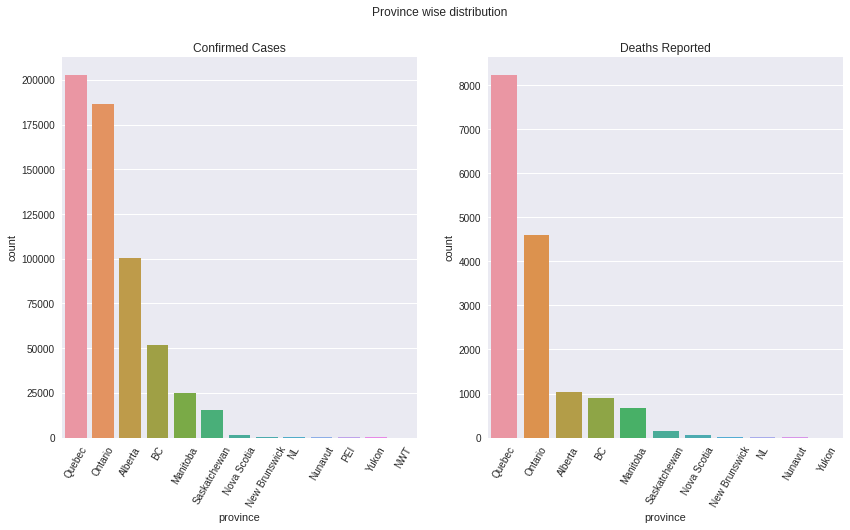

In [10]:
order_mort=df_mort.province.value_counts().index
order_conf=df_cases[df_cases.province!='Repatriated'].province.value_counts().index
plt.figure(figsize=(14,7))
plt.suptitle("Province wise distribution")
plt.style.use('seaborn')
plt.subplot(1,2,1)
plt.title("Confirmed Cases")
sns.countplot('province', data=df_cases[df_cases.province!='Repatriated'], order=order_conf)
plt.xticks(rotation=60)

plt.subplot(1,2,2)
plt.title("Deaths Reported")
sns.countplot('province', data=df_mort, order=order_mort)
plt.xticks(rotation=60)

plt.show()

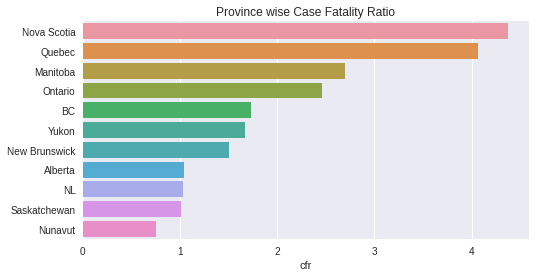

In [11]:
pr_mort=pd.DataFrame(df_mort.province.value_counts())
pr_mort.rename(columns={"province":"deaths"}, inplace=True)
pr_mort["cases"]=0
pr_mort["cfr"]=0
for pr in pr_mort.index:
    pr_mort.cases[pr_mort.index==pr]=df_cases.province.value_counts()[pr]
pr_mort.cfr=round(pr_mort.deaths*100/pr_mort.cases,2)
pr_mort.sort_values(by='cfr', ascending=False, inplace=True)

plt.figure(figsize=(8,4))
plt.title("Province wise Case Fatality Ratio")
sns.barplot(y=pr_mort.index, x='cfr', data=pr_mort, orient='h')
plt.show()

#### Observations: 
  - Most of cases are in the Ontario and Quebec
  - Case fatality rate in Ontario and BC is above 3% and other provinces have fatality rate under 2%.

## Transmission and international arrivals

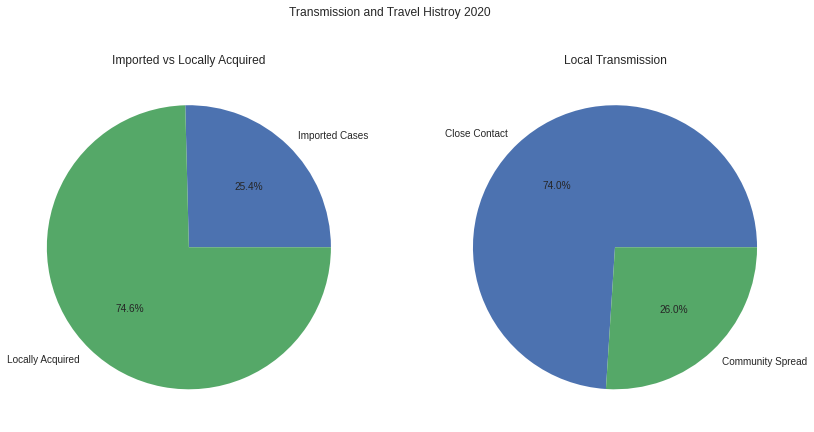

In [12]:
plt.figure(figsize=(14,7))
plt.suptitle("Transmission and Travel Histroy 2020")

plt.subplot(1,2,1)
plt.title("Imported vs Locally Acquired")
label=["Imported Cases", 'Locally Acquired']
x=[df_cases.travel_yn.value_counts()['1'],df_cases.travel_yn.value_counts()['0']]
plt.pie(x, labels=label, autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Local Transmission")
x=[df_cases.locally_acquired.value_counts().sum()-df_cases.locally_acquired.value_counts()['Community'],
   df_cases.locally_acquired.value_counts()['Community']]
labels=["Close Contact", "Community Spread"]
plt.pie(x,labels=labels,autopct='%1.1f%%')

plt.show()

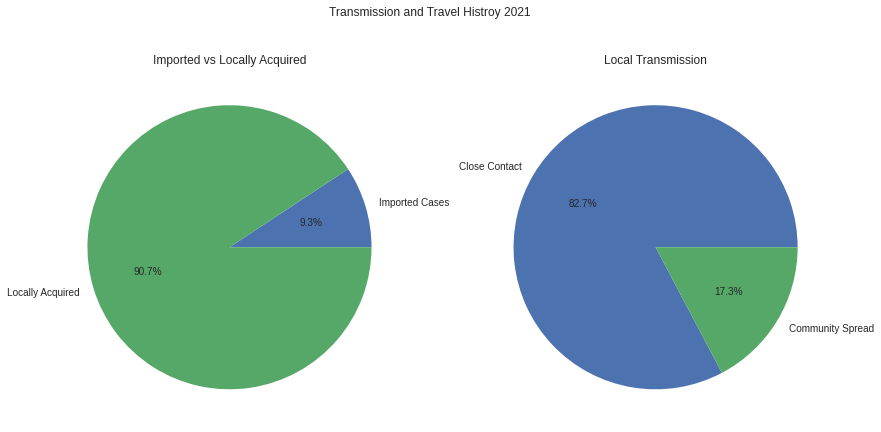

In [13]:
df_cases_2021=pd.read_csv("./covid_19_canada/cases_2021.csv")

plt.figure(figsize=(14,7))
plt.suptitle("Transmission and Travel Histroy 2021")

plt.subplot(1,2,1)
plt.title("Imported vs Locally Acquired")
label=["Imported Cases", 'Locally Acquired']
x=[df_cases_2021.travel_yn.value_counts()['1'],df_cases_2021.travel_yn.value_counts()['0']]
plt.pie(x, labels=label, autopct='%1.1f%%')

plt.subplot(1,2,2)
plt.title("Local Transmission")
x=[df_cases_2021.locally_acquired.value_counts().sum()-df_cases_2021.locally_acquired.value_counts()['Community'],
   df_cases_2021.locally_acquired.value_counts()['Community']]
labels=["Close Contact", "Community Spread"]
plt.pie(x,labels=labels,autopct='%1.1f%%')

plt.show()

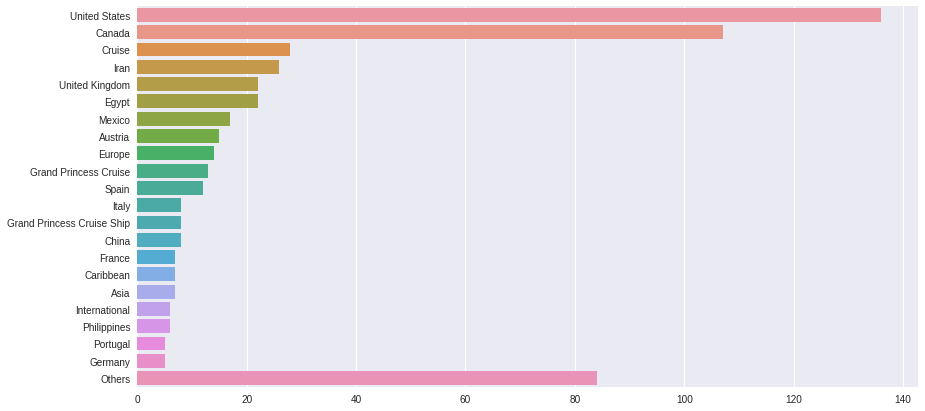

In [14]:
imported=df_cases[df_cases.travel_history_country!='Not Reported'].travel_history_country.value_counts()
plt.figure(figsize=(14,7))
x=list(imported[imported>3])
y=list(imported[imported>3].index)

# Others with less than 4 cases
x.append(imported[imported<4].sum())
y.append("Others")
sns.barplot(x, y, orient='h')
plt.show()

#### Observations: 
  - We see interesting pattern here, in 2020 around 25.4% cases were from international travellers while in 2021 its 9.3%.
  - Majorit of local cases (74% in 2020, 84% in 2021) are due to close contanct and few are due to community transfers.
  - Also the most of case in international patients are from United States with land border. 
  - The current restrictions with hotel quarantine only applies to air travellers but its not for people travelling through land border.
  
  
  - So as per above observation I think government should lessen the restrictions for international students travelling via airlines.
  
  
  - <i>The current data might so different pattern which I was not able to show here because dataset for 2021 doesnot mention the country of travellers, it only specifies traveller as "international"</i>